<a href="https://colab.research.google.com/github/ArshiaYousefnia/Analytical_Mechanics_Project/blob/main/AM2_project_401110415.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics II Project
## Arshia Yousefnia
## STUD ID: 401110415

## 1 dimensional lattice

We study a 1D lattice of particles and springs for it's small oscillations around euqilibrium by constructing standard tensors K and M, we have fixed boundary conditions:

\begin{gather*}
  T = \frac{1}{2}\dot{q}^TM\dot{q} \\
  V = \frac{1}{2}q^TKq \\
  L = T - V \implies M\ddot{q} + Kq = 0 \\
  q = a e^{i\omega t} \implies \\
  (M^{-1}K)q = \omega^2q
\end{gather*}

We generate a random inital condition on q (speeds being zero), then we find the solution to it using the eigenvalues and eigenvectors found above. as it's shown below, we can input general number of masses to the system, the coefficients of springs can also be determined but are set to a default value if not provided.

Finally we generate the whole video of simulation, where size of masses is determined by their mass.

##Importing neccessary packages

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

## The simulation core

In [110]:
class Lattice_1d():
    def __init__(self, m = 4 * [1], k = 5 * [1], l = 1):
      self.n = len(m)
      self.m = np.array(m) # n
      self.k = np.array(k) # n + 1
      self.l = l

      self.M = np.diag(self.m)

      self.K = np.zeros((self.n, self.n))

      for i in range(1, self.n - 1):
          self.K[i, i] = k[i] + k[i + 1]
          self.K[i, i - 1] = -1 * k[i]
          self.K[i, i + 1] = -1 * k[i + 1]

      self.K[0, 1] = -1 * k[1]
      self.K[0, 0] = k[0] + k[1]
      self.K[-1, -1] = k[-1] + k[-2]
      self.K[-1, -2] = -1 * k[-2]

      self.Q = np.linalg.inv(self.M) @ self.K

      #Eigenvectos and eigenvalues
      self.eigenvalues, self.eigenvectors = np.linalg.eig(self.Q)
      self.frequencies = np.sqrt(self.eigenvalues)
      print("eigenvalues:\n", self.eigenvalues)
      print("eigenvectors:\n", self.eigenvectors)

    def random_initial_conditions(self):
      self.q_0 = np.random.rand(self.n) * 1e-1
      self.coefficients = self.eigenvectors.T @ self.q_0

    def get_q_at(self, t):
      q = 0
      for i in range(self.n):
        q += self.coefficients[i] * np.cos(self.frequencies[i] * t) * self.eigenvectors[:, i]
      return q



## graphical component

In [108]:
class lattice_plotter():
  def __init__(self, lattice_1d):
    self.lattice = lattice_1d
    self.lattice.random_initial_conditions()

    self.X = np.zeros(self.lattice.n)
    for i in range(self.lattice.n):
      self.X[i] = i + 1

  def plot_at_time(self, t, ax):
    q = self.lattice.get_q_at(t)
    x = self.X + q

    x = x * self.lattice.l

    ax.clear()
    art = ax.set_title(f"t= {t:.2f}")
    ax.grid()
    ax.plot([0, (self.lattice.n + 1) * self.lattice.l], [0, 0], c='r')
    art = ax.scatter(x, np.zeros(self.lattice.n), c='b', s = 150 * np.sqrt(self.lattice.m))

    return art


##Utilization

eigenvalues:  [0.08980027 0.34553338 0.92125871 3.22785048 3.61968718 2.09586998]
eigenvectors:
 [[-0.14397748  0.08656724  0.41388505 -0.97481858 -0.01143195 -0.00779433]
 [-0.41900322  0.22978985  0.86035994  0.22211288  0.00708423 -0.00704709]
 [-0.61877575  0.21421234 -0.27839334 -0.01485001 -0.025685    0.02323972]
 [-0.46265854 -0.55711783  0.00882297 -0.00943969  0.83849324 -0.40326093]
 [-0.4028558  -0.65369897  0.07656293  0.00714784 -0.46300382 -0.08729485]
 [-0.21089721 -0.39511161  0.07097432 -0.00582143  0.28586002  0.91055463]]
assembling generated frames to make video output...


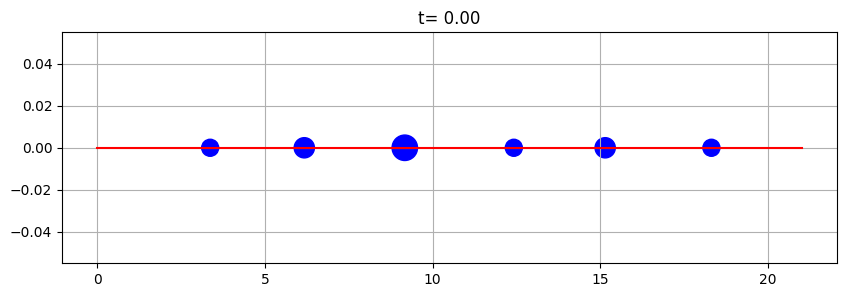

In [112]:
lattice = Lattice_1d(l = 3, m = [1, 2, 5, 1, 2, 1], k = [2, 1, 1, 0.5, 2, 1, 1])
plotter = lattice_plotter(lattice)
fig, ax = plt.subplots()
fig.set_size_inches(10, 3)


q = 0.05

def update(i):
  return plotter.plot_at_time(i * q, ax)

ani = animation.FuncAnimation(fig=fig, func=update, frames=600, interval=30)
print("assembling generated frames to make video output...")
html = ani.to_html5_video()
html = display.HTML(html)
display.display(html)